# 01. Introdução

 <p> A lavagem de dinheiro é um crime financeiro que envolve a dissimulação da origem ilícita de fundos, tornando-os aparentemente legítimos. É uma atividade complexa e prejudicial que afeta diretamente a estabilidade econômica e a integridade dos sistemas financeiros em todo mundo. Como resposta a esse problema, os orgãos reguladores e as instituições financeiras têm se empenhado em implementar medidas efetivas de prevenção a lavagem de dinheiro. </p>
 
  A análise de dados desempenha um papel fundamental nesse esforço, oferecendo uma abordagem baseada em evidências para identificar e mitigar atividades suspeitas. Por meio da utilização de técnicas é possivel identificar transações potencialmente ilícitas.
 
 

**Exemplo Fictício:**

O cenário abaixo é um exemplo ficticio para demonstrar o processo. **Os dados utilizidados aqui são fictícios e não deve ser considerados como informações reais.**

# 02. Processo de ETL com Integration Service

**Sobre ETL:** ETL é uma sigla que representa as três etapas fundamentais de um processo de integração de dados: Extração(Extraction), Transformação(Transformation) e Carga(Loading). É um processo usado para coletar dados de diferentes fontes, transformá-los em um formato adequado e carregá-los em um local destino, como um data warehouse, banco de dados ou outro sistema de armazenamento.

**Sobre Integration Service:** É um componente que faz parte de uma plataforma de integração de dados, como o Microsoft SQL Integration Service (SSIS) ou o Informatica PowerCenter. Ele desempenha um papel fundamental na execução de processos ETL e no gerenciamento do fluxo de dados entre diferentes fontes e destinos.

Por meio de interface gráfica intuitiva, o Integration Service facilita a criação e a organização dos componentes do fluxo de trabalho, como conexões com fonte de dados, transformações, tarefas de controle de fluxo e configurações de carga. 

## 02.01 Extração:

Para a extração das informações vamos utilizar nesse exemplo um arquivo .csv

Esse arquivo contem as informações do cliente e operações realizadas pela instituição em (D-1)(dia menos um, em tradução livre) 
e é usado para indicar que os dados utilizados em uma determinada análise ou processamento são referentes ao dia anterior ao 
dia atual.

**Exemplo de Arquivo:**

<img src="Exemplo_Dados_2.GIF" alt="Texto Alternativo">


**Fluxo de Extração e Carga de Dados:**

**Principais Etapas do Pacote DTSX:**

1. Limpeza da Tabela temporaria.

<img src="Fluxo_Limpeza_Dados.GIF" alt="Texto Alternativo"> 

2. Fluxo de Leitura do Arquivo Origem e Carga na Tabela Destino

<img src="Fluxo_Dados.GIF" alt="Texto Alternativo"> 

3. Executar Procedure para atualização dos dados.

<img src="Procedure_Carga_Procedure.GIF" alt="Texto Alternativo"> 


**Conclusão:** Após a execução da carga são alimentadas as tabelas relacionadas a clientes e operações realizadas em (D-1) dia anterior ao dia atual.

# 03. Execução de Regra

Nesse exemplo vamos utilizar a execução de uma regra para separa as operações de altos valores.

### 03.01 Execução de Movimentação de Altos Valores

O objetivo da Procedure é verificar movimentações de valor igual ou superior ao Parametro01 que é definido pelo Compliance da instituição financeira.

<img src="Mov_Altos_Valores.GIF" alt="Texto Alternativo"> 


<img src="Criar_TabelaTemporaria.GIF"> 

Verifica as operações de alto valor noo periodo analisado.

<img src="Verifica_Operacoes_AltosValores.GIF"> 

**Conclusão:** Após a analise as movimentações de altos valores são separadas em tabelas apartadas para posterior verificação das áreas responsáveis da instituição.

# 04. Consultas e Relatórios

Nessa etapa da vamos realizar algumas consultas e análises após as etapas apresentadas nos passos 2 e 3. 

Para essa etapa vamos utilizar SQL e Python.

### 04.01 - Importando Bibliotecas

In [6]:
#Importando os pacotes necessários para integrar o SQL com Python

from datetime import date
import time
import socket
import pandas as pd
import pymssql as sql
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
Quantidade_Total_Alertas = pd.read_sql_query("""select count (*) as quantidade from dbo.tgr_alertas
where cd_enquadramento = 1
and dt_movimentacao = '2020-07-31'""", conexao)

#Fecha conexão com banco de dados
conexao.close()

### 04.02 - Quantidade de Alertas gerados após a análise de Movimentações de Altos Valores

In [14]:
Quantidade_Total_Alertas.head(1)

,quantidade
0,95


### 04.03 - Clientes com maior incidencia de Alertas

In [15]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
Clientes_Alertas = pd.read_sql_query("""select top 15 count (*) as quantidade, cd_cliente from dbo.tgr_alertas
where cd_enquadramento = 1
and dt_movimentacao = '2020-07-31'
group by cd_cliente
order by quantidade desc;""", conexao)

#Fecha conexão com banco de dados
conexao.close()

In [16]:
Clientes_Alertas.head(15)

,quantidade,cd_cliente
0,9,196592
1,9,207703
2,7,182151
3,5,143577
4,4,22339
5,4,846017
6,4,865396
7,3,16874
8,3,222146
9,3,450766


In [17]:
import seaborn as sb

<AxesSubplot:xlabel='quantidade', ylabel='Count'>

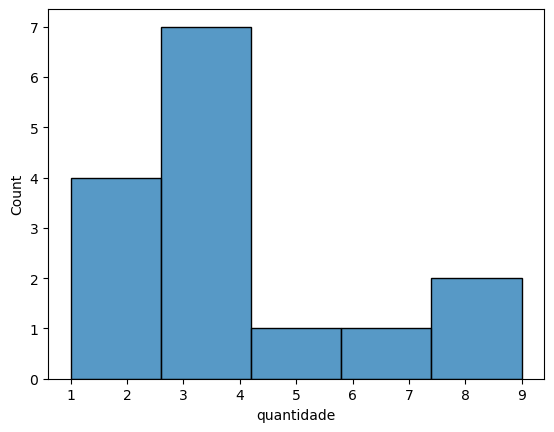

In [20]:
sb.histplot(Clientes_Alertas['quantidade'])

**Conclusão:** Dentre os clientes que tiveram maior numero de alertas gerados temos uma maior concentração entre 3 e 4 alertas.
Os cliente com maior incidencia de alertas deve ser priorizado durantes os processos de verificação pelo compliance da instituição.